# ANN Data Set using Dropout Regression

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Libraries](#section2)
3. [Data Exploration](#section3)
4. [EDA](#section4)<br>
    - 4.1 [Age Analysis](#section401)<br>
    - 4.2 [Checking for Outliers](#section402)<br>
    - 4.3 [Job Distribution](#section403)<br>
    - 4.4 [Marital status distribution](#section404)<br>
    - 4.5 [Eduction](#section405)<br>
    - 4.6 [Loan Analysis](#section406)<br>
    - 4.7 [Medium of Contact](#section407)<br>
    - 4.8 [Call duration](#section408)<br>
    - 4.9 [Corelation Heat map](#section409)<br>
5. [Model Implementation](#section5)<br>
    - 5.1 [Splitting X and Y into training and test dataset](#section501)<br>
    - 5.2 [Encoding](#section502)<br>
    - 5.3 [Fitting the model](#section503)<br>
    - 5.4 [ANN without Droupout regression](#section504)<br>
    - 5.5 [ANN with Droupout regression](#section505)<br>
    - 5.6 [Confusion Matrix](#section506)<br>

6. [Conclusion](#section6)<br>
    

### 1. Problem Statement

The data set is all about the market segmentation regarding the loan of varoius age group and using ANN model we are 
predicting to check wheather the future loan must be approved or no

### 2. Importing Laibraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam


### 3. Data exploration

In [3]:
df=pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,jumlah_tanggungan
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job                41188 non-null  object 
 2   marital            41188 non-null  object 
 3   education          41188 non-null  object 
 4   default            41188 non-null  object 
 5   housing            41188 non-null  object 
 6   loan               41188 non-null  object 
 7   contact            41188 non-null  object 
 8   month              41188 non-null  object 
 9   day_of_week        41188 non-null  object 
 10  duration           41188 non-null  int64  
 11  campaign           41188 non-null  int64  
 12  pdays              41188 non-null  int64  
 13  previous           41188 non-null  int64  
 14  poutcome           41188 non-null  object 
 15  emp.var.rate       41188 non-null  float64
 16  cons.price.idx     411

In [5]:
df.duplicated().sum()

1

In [6]:
# dropping duplicates
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,jumlah_tanggungan
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,3
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,4
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,5
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,4


In [7]:
df.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
jumlah_tanggungan    0
dtype: int64

In [8]:
uni=[df[i].unique() for i in df.columns]
uni

[array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
        49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
        28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
        77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
        74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64),
 array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['telephone', 'cellular'], dtype=object),
 array(['may',

### 4. EDA

### 4.1 Age Analysis

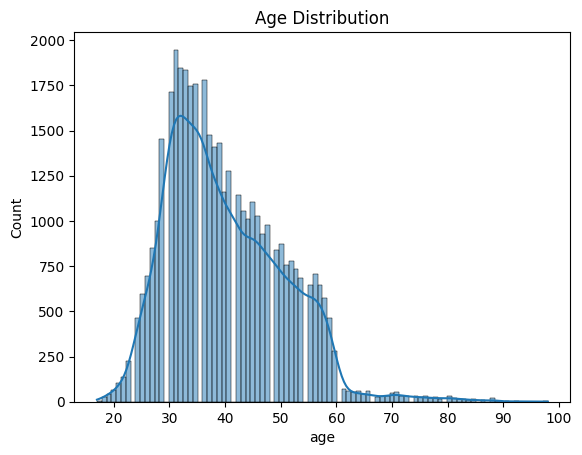

In [9]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

### 4.2 Checking for Outliers

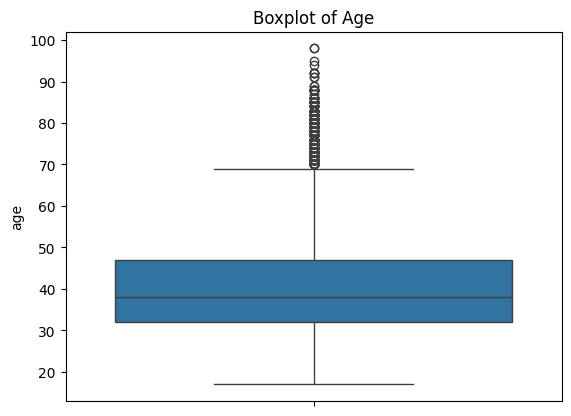

In [10]:
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')
plt.show()

### 4.3 Job Distribution

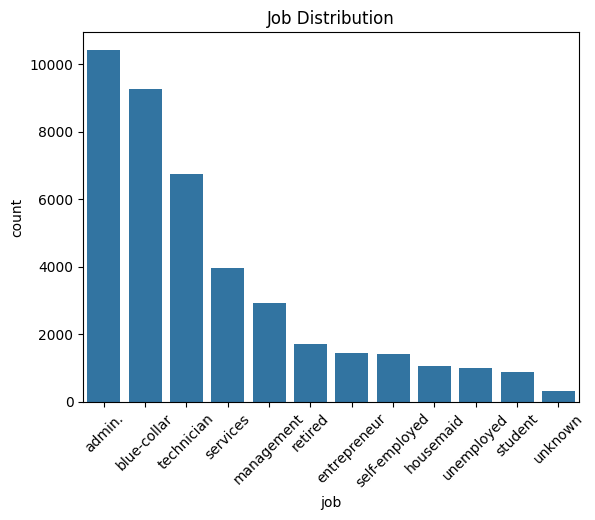

In [11]:
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()

### 4.4 Marital Status Distribution

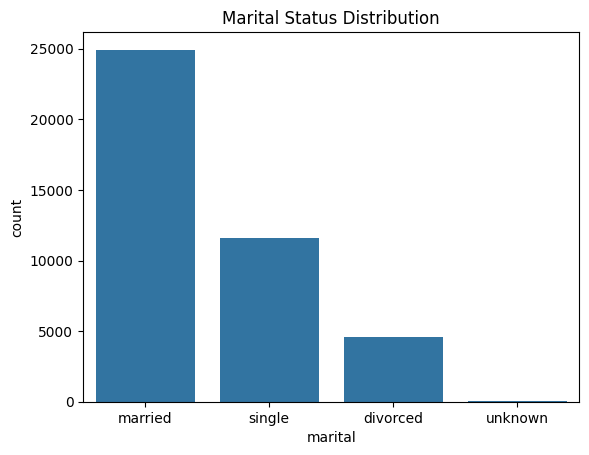

In [12]:
sns.countplot(data=df, x='marital')
plt.title('Marital Status Distribution')
plt.show()

### 4.5 Education

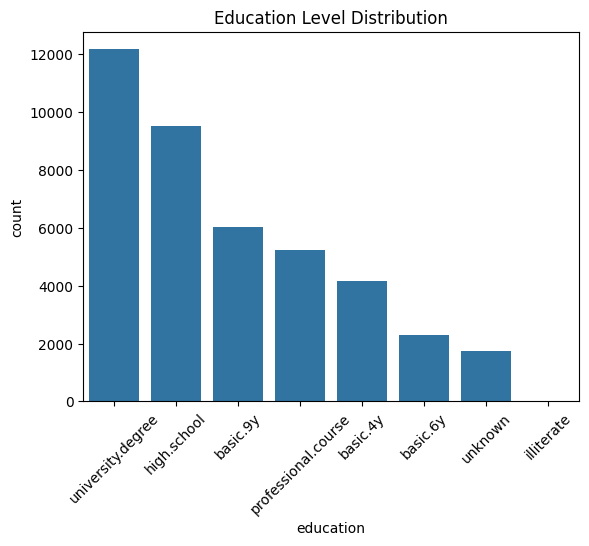

In [13]:
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

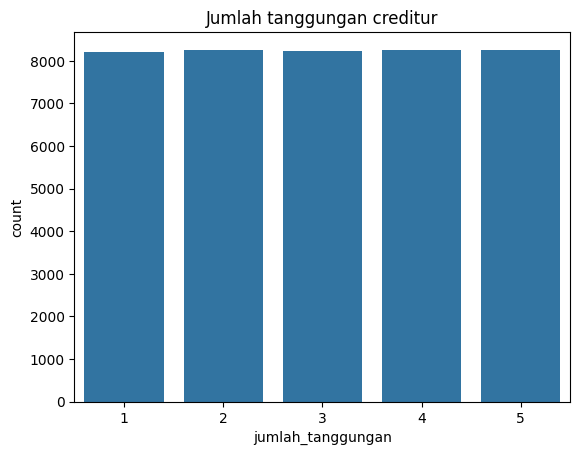

In [14]:
sns.countplot(data=df, x='jumlah_tanggungan')
plt.title('Jumlah tanggungan creditur')
plt.show()

### 4.6 Loan Analysis

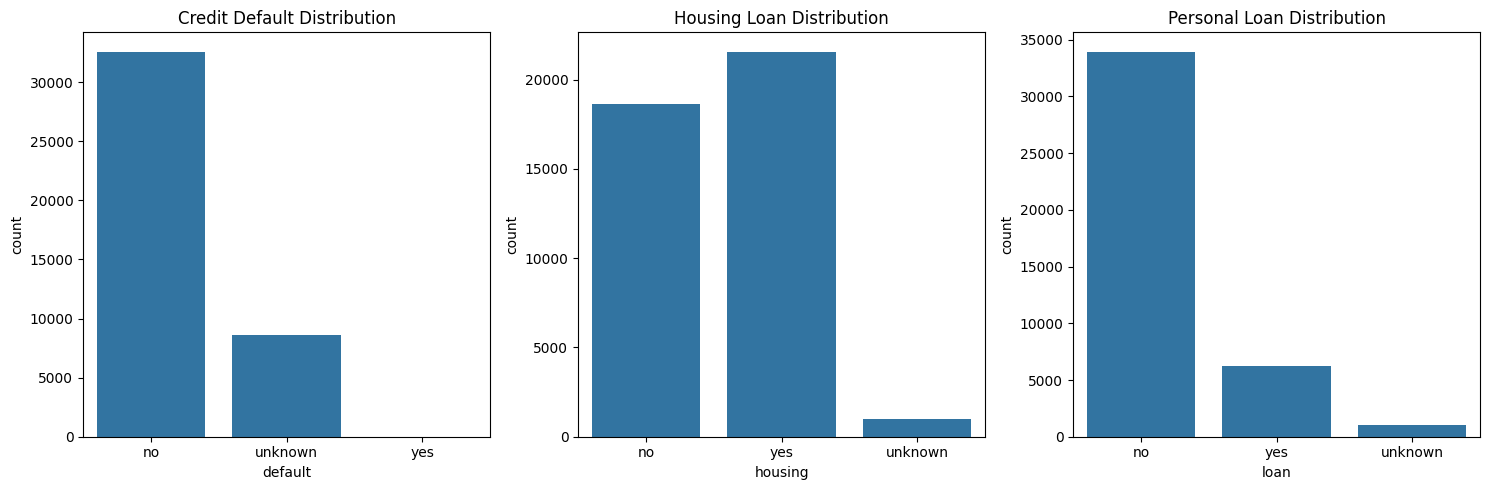

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(data=df, x='default', ax=ax[0])
ax[0].set_title('Credit Default Distribution')

sns.countplot(data=df, x='housing', ax=ax[1])
ax[1].set_title('Housing Loan Distribution')

sns.countplot(data=df, x='loan', ax=ax[2])
ax[2].set_title('Personal Loan Distribution')

plt.tight_layout()
plt.show()

### 4.7 Medium of Contact

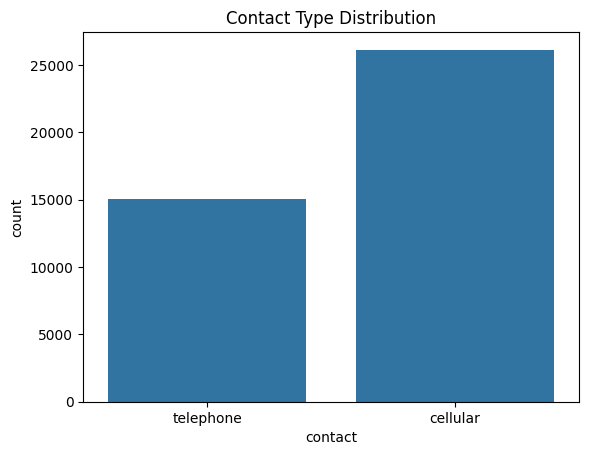

In [16]:
sns.countplot(data=df, x='contact')
plt.title('Contact Type Distribution')
plt.show()


### 4.8 Call Duration

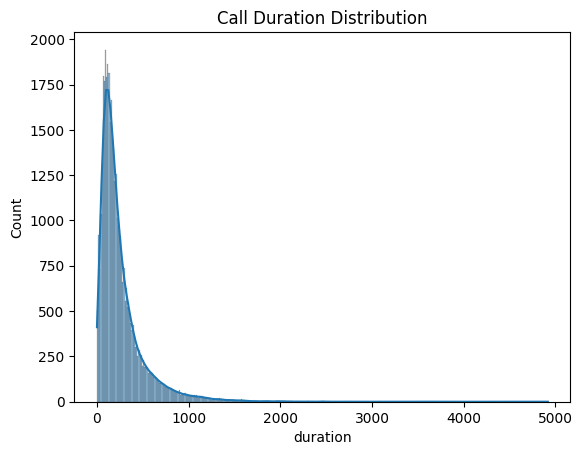

In [17]:
sns.histplot(df['duration'], kde=True)
plt.title('Call Duration Distribution')
plt.show()

### 4.9 Coralation Heatmap

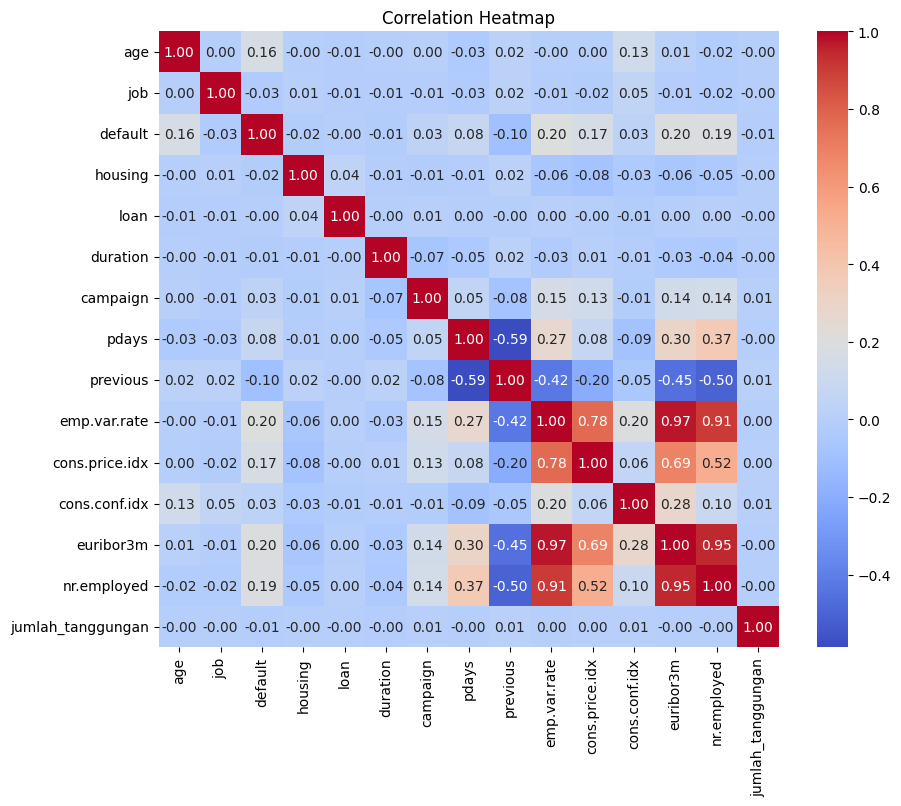

In [18]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom kategorikal yang perlu diubah
categorical_cols = ['job', 'default', 'housing', 'loan']

# Lakukan Label Encoding untuk semua kolom kategorikal
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Lakukan perhitungan korelasi pada kolom numerik
numeric_cols = [
    'age', 'job', 'default', 'housing', 'loan', 'duration', 
    'campaign', 'pdays', 'previous', 'emp.var.rate', 
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'jumlah_tanggungan'
]
corr = df[numeric_cols].corr()

# Plot heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Utilizing the random forest to determine which columns to eliminate based on feature significance.

### 5. Model Implementation

### 5.1 Spliting X and Y into train and test dataset

Kode ini akan mencetak fitur-fitur yang digunakan oleh model, diurutkan berdasarkan tingkat kontribusinya dalam prediksi (dari yang paling penting ke yang kurang penting).

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame and 'y' is the target column

# Selecting features and target
X = df[['age', 'job', 'default', 'housing', 'loan', 'duration', 'emp.var.rate', 'euribor3m', 'nr.employed', 'jumlah_tanggungan']]
y = df['y'].map({'yes': 1, 'no': 0})  # Converting 'yes' and 'no' to binary

# Training the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extracting feature importances
feature_importances = rf.feature_importances_

# Mapping features to their importance
features_dict = dict(zip(X.columns, feature_importances))

# Sorting and displaying the features by importance
sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)

print(sorted_features)

[('duration', 0.38376062197977673), ('euribor3m', 0.19536782733135913), ('age', 0.13462601759847306), ('nr.employed', 0.08118761287536005), ('job', 0.06411839145221147), ('jumlah_tanggungan', 0.05554164661743618), ('emp.var.rate', 0.03623314447430191), ('housing', 0.022856300572505078), ('loan', 0.01693922015383285), ('default', 0.009369216944743405)]


In [20]:
df.drop(['emp.var.rate'],axis=1,inplace=True)
df.drop(['nr.employed'],axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job                41188 non-null  int32  
 2   marital            41188 non-null  object 
 3   education          41188 non-null  object 
 4   default            41188 non-null  int32  
 5   housing            41188 non-null  int32  
 6   loan               41188 non-null  int32  
 7   contact            41188 non-null  object 
 8   month              41188 non-null  object 
 9   day_of_week        41188 non-null  object 
 10  duration           41188 non-null  int64  
 11  campaign           41188 non-null  int64  
 12  pdays              41188 non-null  int64  
 13  previous           41188 non-null  int64  
 14  poutcome           41188 non-null  object 
 15  cons.price.idx     41188 non-null  float64
 16  cons.conf.idx      411

In [22]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)


['marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Using one hot on all columns except for education

### 5.2 Encoding

In [23]:
# List of non-numeric columns excluding 'education' and target
non_numeric_cols.remove('education')
non_numeric_cols.remove('y')

# One-Hot Encoding for all non-numeric columns except 'education'
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)  # drop_first to avoid dummy variable trap

# Label Encoding for 'education'
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df.head()

,age,job,education,default,housing,loan,duration,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,3,0,0,0,0,261,1,999,0,...,True,False,False,False,True,False,False,False,True,False
1,57,7,3,1,0,0,149,1,999,0,...,True,False,False,False,True,False,False,False,True,False
2,37,7,3,0,2,0,226,1,999,0,...,True,False,False,False,True,False,False,False,True,False
3,40,0,1,0,0,0,151,1,999,0,...,True,False,False,False,True,False,False,False,True,False
4,56,7,3,0,0,2,307,1,999,0,...,True,False,False,False,True,False,False,False,True,False


In [24]:
df.head()

,age,job,education,default,housing,loan,duration,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,3,0,0,0,0,261,1,999,0,...,True,False,False,False,True,False,False,False,True,False
1,57,7,3,1,0,0,149,1,999,0,...,True,False,False,False,True,False,False,False,True,False
2,37,7,3,0,2,0,226,1,999,0,...,True,False,False,False,True,False,False,False,True,False
3,40,0,1,0,0,0,151,1,999,0,...,True,False,False,False,True,False,False,False,True,False
4,56,7,3,0,0,2,307,1,999,0,...,True,False,False,False,True,False,False,False,True,False


### 5.3 Fitting The Model

In [25]:
from sklearn.model_selection import train_test_split
X=df.drop('y',axis=1)
y=df['y']
y = (y == 'yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [27]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

C:\Users\aryaa\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aryaa\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1538, in _execute_ch

### 5.4 ANN without Dropout Regression

In [28]:
from tensorflow.keras.callbacks import EarlyStopping



# Define a function to create the neural network model
def create_model_without_dropout():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_resampled.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define k-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
train_acc_scores = []
test_acc_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled), 1):
    X_train_fold, X_val_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_val_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    # Create and compile the model
    model = create_model_without_dropout()

    # Train the model with early stopping
    history_no_dropout=model.fit(
        X_train_fold, y_train_fold,
        epochs=100,  # You can adjust the maximum number of epochs
        batch_size=32,
        verbose=1,
        validation_data=(X_val_fold, y_val_fold),
        # callbacks=[early_stopping]  # Add the early stopping callback
    )

    # Evaluate on training data
    train_acc = model.evaluate(X_train_fold, y_train_fold, verbose=0)[1]
    train_acc_scores.append(train_acc)

    # Evaluate on validation data
    val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
    test_acc_scores.append(val_acc)

    print(f"Fold {fold} completed.")


# Calculate and print the average accuracy scores
avg_train_acc = np.mean(train_acc_scores)
avg_test_acc = np.mean(test_acc_scores)
print(f'Average Training Accuracy: {avg_train_acc}')
print(f'Average Validation Accuracy: {avg_test_acc}')

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

C:\Users\aryaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8706 - loss: 0.3228 - val_accuracy: 0.9029 - val_loss: 0.2516
Epoch 2/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9082 - loss: 0.2430 - val_accuracy: 0.9083 - val_loss: 0.2373
Epoch 3/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9178 - loss: 0.2144 - val_accuracy: 0.9143 - val_loss: 0.2321
Epoch 4/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9207 - loss: 0.2047 - val_accuracy: 0.9248 - val_loss: 0.2109
Epoch 5/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9322 - loss: 0.1813 - val_accuracy: 0.9258 - val_loss: 0.2048
Epoch 6/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9379 - loss: 0.1671 - val_accuracy: 0.9259 - val_loss: 0.2050
Epoch 7/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9430 - loss: 0.1551 - val_accuracy: 0.9277 - val_loss: 0.2040
Epoch 8/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9476 - loss: 0

C:\Users\aryaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8648 - loss: 0.3261 - val_accuracy: 0.8957 - val_loss: 0.2640
Epoch 2/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9056 - loss: 0.2447 - val_accuracy: 0.9020 - val_loss: 0.2477
Epoch 3/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9167 - loss: 0.2197 - val_accuracy: 0.9122 - val_loss: 0.2331
Epoch 4/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9254 - loss: 0.2010 - val_accuracy: 0.9211 - val_loss: 0.2166
Epoch 5/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9341 - loss: 0.1841 - val_accuracy: 0.9229 - val_loss: 0.2141
Epoch 6/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9377 - loss: 0.1700 - val_accuracy: 0.9253 - val_loss: 0.2024
Epoch 7/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9443 - loss: 0.1573 - val_accuracy: 0.9275 - val_loss: 0.1976
Epoch 8/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9481 - loss: 0

C:\Users\aryaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8606 - loss: 0.3384 - val_accuracy: 0.8975 - val_loss: 0.2619
Epoch 2/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9089 - loss: 0.2407 - val_accuracy: 0.9115 - val_loss: 0.2332
Epoch 3/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9185 - loss: 0.2170 - val_accuracy: 0.9158 - val_loss: 0.2215
Epoch 4/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9264 - loss: 0.2016 - val_accuracy: 0.9180 - val_loss: 0.2135
Epoch 5/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9302 - loss: 0.1883 - val_accuracy: 0.9232 - val_loss: 0.2029
Epoch 6/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9386 - loss: 0.1678 - val_accuracy: 0.9270 - val_loss: 0.2063
Epoch 7/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9456 - loss: 0.1514 - val_accuracy: 0.9307 - val_loss: 0.2111
Epoch 8/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9518 - loss: 0

Results: before add data
    
- Average Training Accuracy: 0.9705336689949036
- Average Validation Accuracy: 0.9412626425425211

- Test Loss: 0.3639366030693054
- Test Accuracy: 0.8884033560752869

Results: 
    
- Average Training Accuracy: 0.9309426148732504
- Average Validation Accuracy: 0.9149133364359537

- Test Loss: 0.24705535173416138
- Test Accuracy: 0.874484121799469

### 5.5 ANN with Dropout Regression

In [29]:
from tensorflow.keras.callbacks import EarlyStopping



# Define a function to create the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_resampled.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define k-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
train_acc_scores = []
test_acc_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled), 1):
    X_train_fold, X_val_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_val_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    # Create and compile the model
    model = create_model()

    # Train the model with early stopping
    history_dropouty=model.fit(
        X_train_fold, y_train_fold,
        epochs=100,  # You can adjust the maximum number of epochs
        batch_size=32,
        verbose=1,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping]  # Add the early stopping callback
    )

    # Evaluate on training data
    train_acc = model.evaluate(X_train_fold, y_train_fold, verbose=0)[1]
    train_acc_scores.append(train_acc)

    # Evaluate on validation data
    val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
    test_acc_scores.append(val_acc)

    print(f"Fold {fold} completed.")


# Calculate and print the average accuracy scores
avg_train_acc = np.mean(train_acc_scores)
avg_test_acc = np.mean(test_acc_scores)
print(f'Average Training Accuracy: {avg_train_acc}')
print(f'Average Validation Accuracy: {avg_test_acc}')

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


Epoch 1/100


C:\Users\aryaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1066/1066 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6939 - loss: 0.6078 - val_accuracy: 0.8918 - val_loss: 0.2887
Epoch 2/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8802 - loss: 0.3221 - val_accuracy: 0.8967 - val_loss: 0.2675
Epoch 3/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8872 - loss: 0.2998 - val_accuracy: 0.8995 - val_loss: 0.2606
Epoch 4/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8925 - loss: 0.2878 - val_accuracy: 0.9064 - val_loss: 0.2516
Epoch 5/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8979 - loss: 0.2693 - val_accuracy: 0.9074 - val_loss: 0.2456
Epoch 6/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8981 - loss: 0.2630 - val_accuracy: 0.9015 - val_loss: 0.2537
Epoch 7/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9016 - loss: 0.2580 - val_accuracy: 0.9140 - val_loss: 0.2343
Epoch 8/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9049 - loss: 0.2476 - val_

C:\Users\aryaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6962 - loss: 0.5911 - val_accuracy: 0.8840 - val_loss: 0.3195
Epoch 2/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8757 - loss: 0.3341 - val_accuracy: 0.8909 - val_loss: 0.2787
Epoch 3/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8908 - loss: 0.2998 - val_accuracy: 0.8930 - val_loss: 0.2701
Epoch 4/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8918 - loss: 0.2906 - val_accuracy: 0.8952 - val_loss: 0.2687
Epoch 5/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8969 - loss: 0.2712 - val_accuracy: 0.9011 - val_loss: 0.2536
Epoch 6/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8987 - loss: 0.2650 - val_accuracy: 0.9034 - val_loss: 0.2478
Epoch 7/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8999 - loss: 0.2611 - val_accuracy: 0.9064 - val_loss: 0.2397
Epoch 8/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9065 - loss: 0

C:\Users\aryaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7203 - loss: 0.6162 - val_accuracy: 0.8802 - val_loss: 0.3274
Epoch 2/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8727 - loss: 0.3379 - val_accuracy: 0.8950 - val_loss: 0.2892
Epoch 3/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8891 - loss: 0.3036 - val_accuracy: 0.8982 - val_loss: 0.2637
Epoch 4/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8907 - loss: 0.2901 - val_accuracy: 0.9000 - val_loss: 0.2627
Epoch 5/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8949 - loss: 0.2778 - val_accuracy: 0.9042 - val_loss: 0.2544
Epoch 6/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8948 - loss: 0.2724 - val_accuracy: 0.9047 - val_loss: 0.2430
Epoch 7/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8981 - loss: 0.2654 - val_accuracy: 0.9045 - val_loss: 0.2431
Epoch 8/100
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8982 - loss: 0

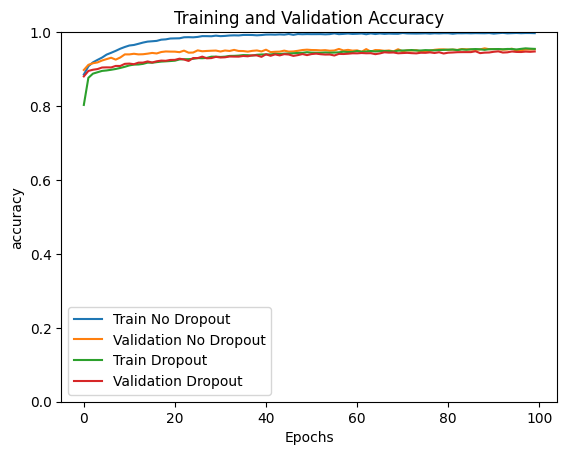

In [30]:
import matplotlib.pyplot as plt

# Function to plot training and validation metrics
def plot_metrics(history1, history2, metric_name, title, ylim=0.5):
    plt.plot(history1.history[metric_name], label='Train No Dropout')
    plt.plot(history1.history[f'val_{metric_name}'], label='Validation No Dropout')
    plt.plot(history2.history[metric_name], label='Train Dropout')
    plt.plot(history2.history[f'val_{metric_name}'], label='Validation Dropout')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.ylim([0, ylim])
    plt.legend()
    plt.show()

# Assuming 'history_no_dropout' and 'history_dropout' are the histories of the models
plot_metrics(history_no_dropout, history_dropouty, 'accuracy', 'Training and Validation Accuracy', 1)



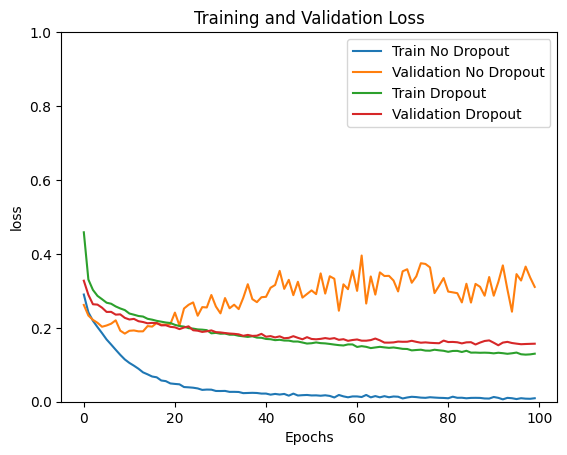

In [31]:
plot_metrics(history_no_dropout, history_dropouty, 'loss', 'Training and Validation Loss', 1)

In [62]:
from graphviz import Digraph

def plot_ann_with_graphviz(layer_sizes):
    dot = Digraph(format='png')
    dot.attr(dpi='300', size='22,12', nodesep='1.0', ranksep='1.5')
    
    # Create nodes for each layer with labels
    for i, layer_size in enumerate(layer_sizes):
        for j in range(layer_size):
            label = f'Layer {i} Neuron {j+1}' if i != len(layer_sizes) - 1 else f'Output Neuron {j+1}'
            dot.node(f'layer{i}_node{j}', label=label, shape='circle', width='0.5', height='0.5', fixedsize='true', style='filled', fillcolor='lightblue')
    
    # Create edges between layers
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                dot.edge(f'layer{i}_node{j}', f'layer{i+1}_node{k}')
    
    dot.attr(rankdir='LR')
    return dot

# Example usage with your model's architecture
layer_sizes = [X_train_resampled.shape[1], 256, 128, 64, 32, 16, 1]
ann_graph = plot_ann_with_graphviz(layer_sizes)
ann_graph.render('ann_architecture', view=True)


'ann_architecture.png'

In [61]:
from graphviz import Digraph

def plot_ann_with_graphviz(layer_sizes):
    dot = Digraph(format='png')
    dot.attr(dpi='300')
    
    # Create nodes for each layer with labels
    for i, layer_size in enumerate(layer_sizes):
        for j in range(layer_size):
            label = f'Layer {i} Neuron {j+1}' if i != len(layer_sizes) - 1 else f'Output Neuron {j+1}'
            dot.node(f'layer{i}_node{j}', label=label, shape='circle', width='0.5', height='0.5', fixedsize='true', style='filled', fillcolor='lightblue')
    
    # Create edges between layers
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                dot.edge(f'layer{i}_node{j}', f'layer{i+1}_node{k}')
    
    dot.attr(rankdir='LR')
    return dot

# Example usage with your model's architecture
layer_sizes = [X_train_resampled.shape[1], 256, 128, 64, 32, 16, 1]
ann_graph = plot_ann_with_graphviz(layer_sizes)
ann_graph.render('ann_architecture', view=True)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.569287 to fit


'ann_architecture.png'

Results: before add data
    
- Average Training Accuracy: 0.9442533055941263
- Average Validation Accuracy: 0.9294761220614115

- Test Loss: 0.3140196204185486
- Test Accuracy: 0.8672816753387451

Results: 
    
- Average Training Accuracy: 0.9074769020080566
- Average Validation Accuracy: 0.9011330604553223

- Test Loss: 0.29462921619415283
- Test Accuracy: 0.8127377033233643

### 5.6 Confusion Matris

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


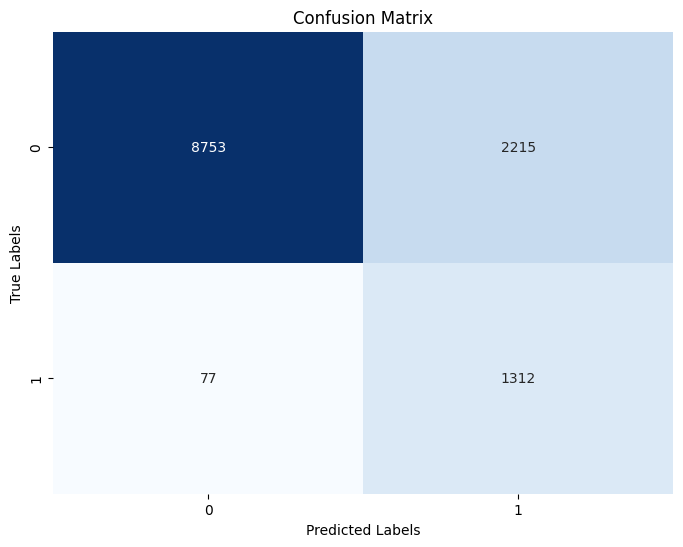

In [60]:
# Get binary predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### 6 Conclusion

### Without Dropout Regression

Results: 
    
- Average Training Accuracy: 0.9309426148732504
- Average Validation Accuracy: 0.9149133364359537

- Test Loss: 0.24705535173416138
- Test Accuracy: 0.874484121799469
    

### With Dropout Regression

Results: 
    
- Average Training Accuracy: 0.9074769020080566
- Average Validation Accuracy: 0.9011330604553223

- Test Loss: 0.29462921619415283
- Test Accuracy: 0.8127377033233643

In this case of data set it is being observed that the dropout regression was not that effective to predict the accruracy
